# Conhecendo a base de dados

## Importando os dados


In [5]:
import pandas as pd

In [6]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"

In [7]:
dados = pd.read_csv(url, sep=";")

In [8]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Características gerais da base de dados

In [9]:
dados.shape

(32960, 9)

In [10]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [11]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [12]:
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [13]:
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [14]:
media = dados['Valor'].mean()
media

12952.659715265761

In [15]:
dados.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [16]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')

<Axes: ylabel='Tipo'>

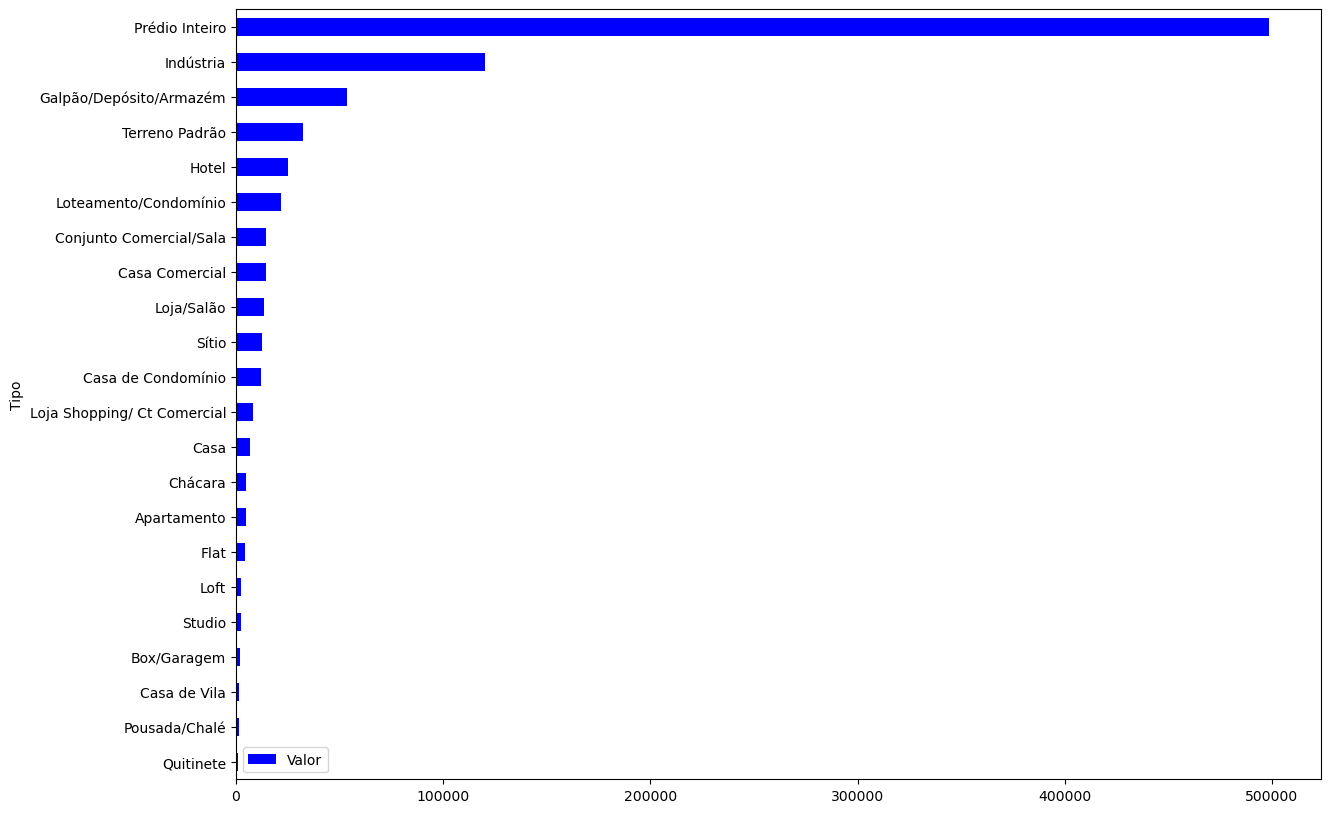

In [17]:
df_preco_tipo.plot(kind='barh', figsize=(14,10), color='blue')

## Removendo os imóveis comerciais

In [18]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [19]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 'Loja/Salão', 'Casa Comercial', 'Prédio Inteiro','Galpão/Depósito/Armazém', 'Terreno Padrão','Loja Shopping/ Ct Comercial', 'Box/Garagem', 'Chácara', 'Loteamento/Condomínio', 'Sítio','Pousada/Chalé', 'Hotel', 'Indústria']

In [20]:
df = dados.query('@imoveis_comerciais not in Tipo')

In [21]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

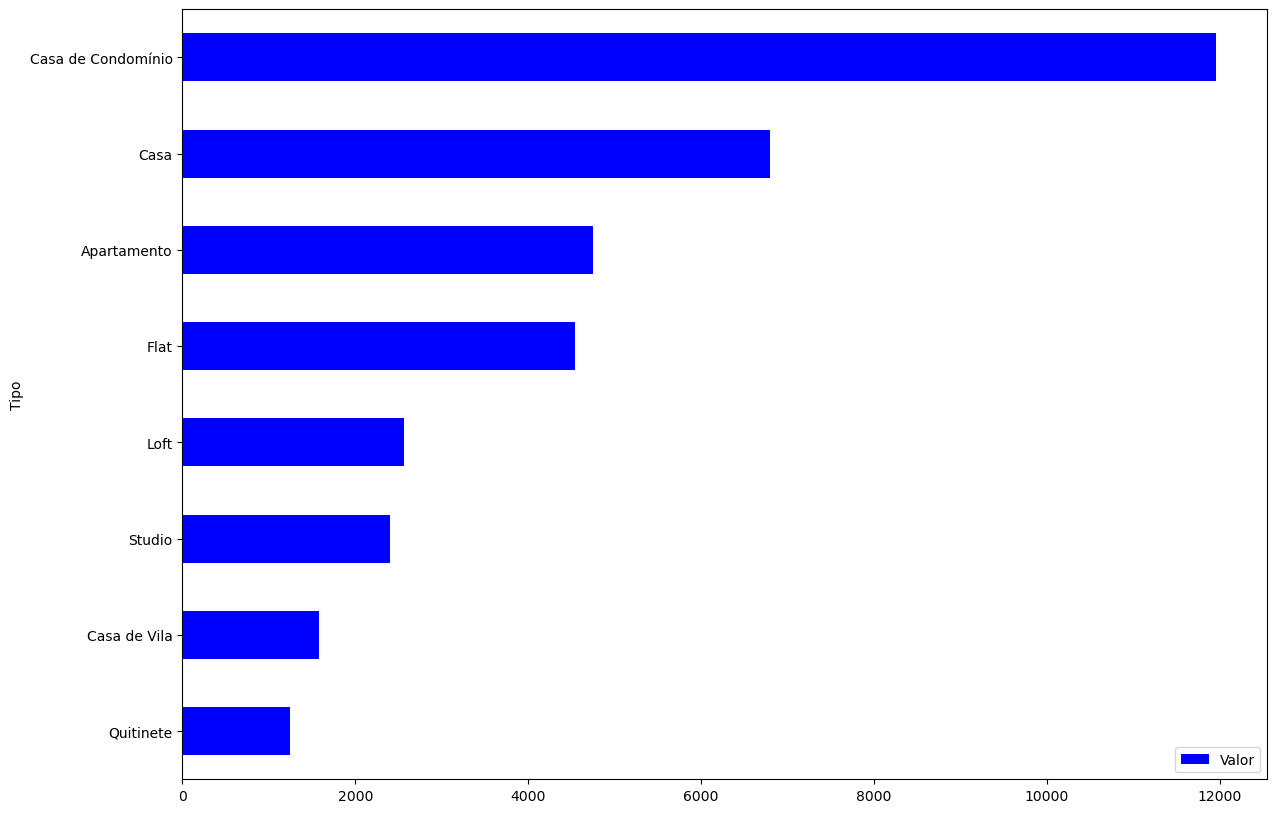

In [22]:
df_tipo_precos = df.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')
df_tipo_precos.plot(kind='barh', figsize=(14,10), color='blue')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [23]:
df.Tipo.value_counts(normalize=True).sort_values(ascending=False)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [24]:
df.Tipo.value_counts(normalize=True).sort_values(ascending=False).to_frame()

,proportion
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


<Axes: title={'center': 'Percentual de imóveis por tipo'}, xlabel='Tipos', ylabel='Percentual'>

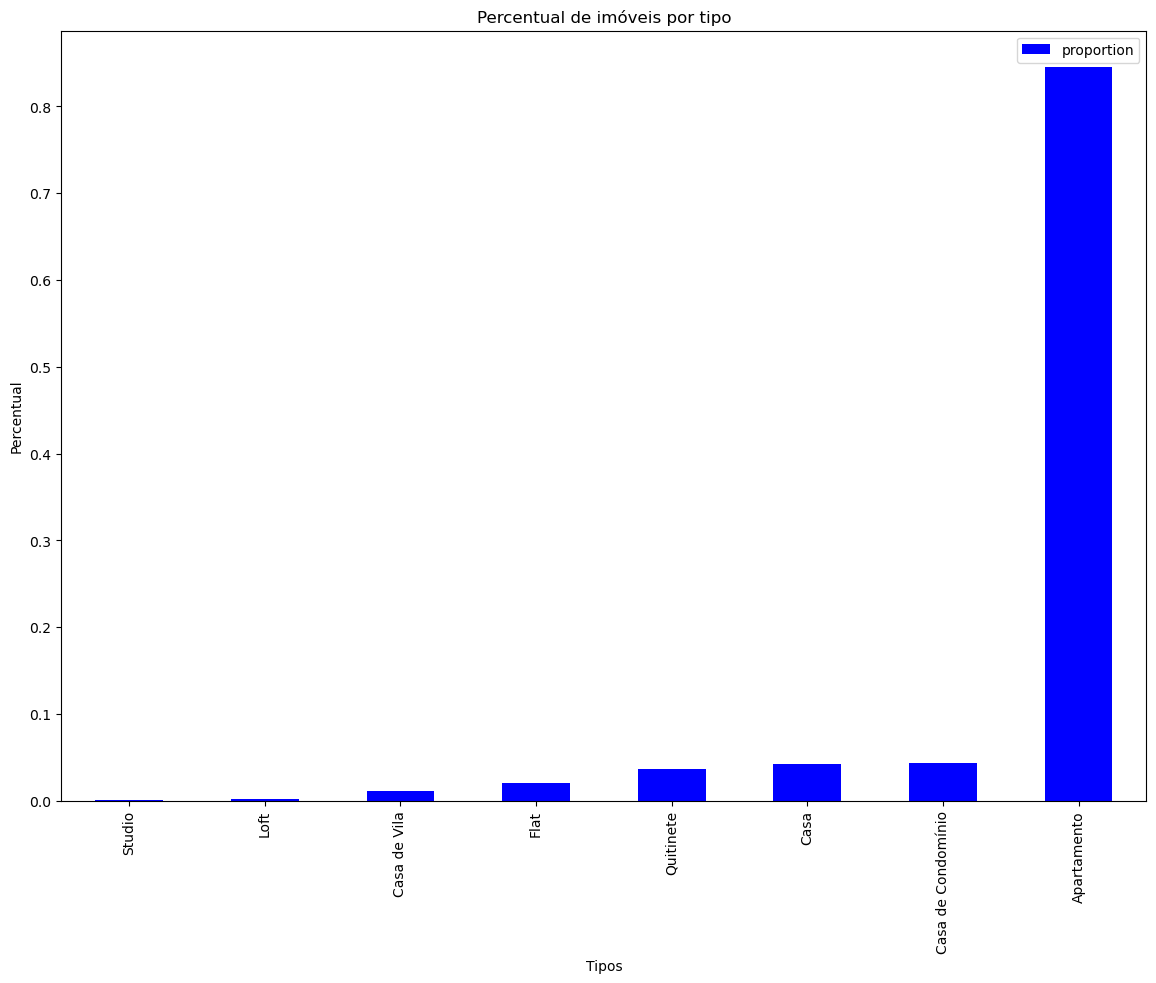

In [25]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')
df_percentual_tipo
df_percentual_tipo.plot(kind='bar', figsize=(14,10), color='blue', xlabel='Tipos', ylabel='Percentual', title='Percentual de imóveis por tipo')

### **Selecionando apenas os imóveis do tipo apartamento**

In [26]:
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Tratando e filtrando os dados

## Lidando com dados nulos

In [27]:
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1865
IPTU          6879
dtype: int64

In [28]:
df = df.fillna(0)
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros

In [29]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32859,Casa,Campo Grande,1,0,0,50,600.0,0.0,0.0
32865,Casa de Vila,Pavuna,2,0,0,55,600.0,0.0,0.0
32893,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,0.0,0.0
32911,Casa,Bento Ribeiro,2,1,0,60,1400.0,0.0,0.0


In [30]:
registros_para_remover = df.query('Valor == 0 | Condominio == 0').index

In [31]:
df.drop(registros_para_remover, axis=0, inplace=True)

In [32]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [33]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [34]:
# separando os imoveis apartamento
df_apartamento = df.query('Tipo == "Apartamento"')

In [35]:
df_apartamento.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [36]:
import pandas as pd

dados = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]],
                        columns = ['Local', 'Produto', 'Preço'])
dados

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [37]:
dados.drop("Local",axis=1,inplace=True)


In [38]:
dados

,Produto,Preço
0,Cebola,2.50
1,Cebola,1.99
2,Cebola,1.69
3,Tomate,4.00
4,Tomate,3.29
5,Tomate,2.99
6,Batata,4.20
7,Batata,3.99
8,Batata,3.69


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [39]:
df['Quartos'] == 1

0         True
3         True
4         True
6        False
11       False
         ...  
32953    False
32955    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 21239, dtype: bool

In [40]:
selecao1 = df['Quartos'] == 1
df[selecao1]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
14,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
...,...,...,...,...,...,...,...,...,...
32922,Apartamento,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Apartamento,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Apartamento,Copacabana,1,0,0,50,1950.0,450.0,70.0
32945,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0


In [41]:
selecao2 = df['Valor'] < 1200
df[selecao2]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...,...
32930,Apartamento,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0


In [42]:
selecao_final = (selecao1) & (selecao2)
df[selecao_final]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32714,Apartamento,Botafogo,1,0,0,21,1000.0,282.0,25.0
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0


In [43]:
df_1 = df[selecao_final]

### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [44]:

selecao = (df["Quartos"] >= 2) & (df["Valor"] < 3000) & (df["Area"] > 70)

In [45]:
df2 = df[selecao]

## Salvando os dados

In [46]:
df.to_csv("dados_apartamentos.csv", index=False)

# Manipulando os dados

## Criando colunas numéricas

In [50]:
url = 'https://raw.githubusercontent.com/millenagena/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [51]:
dados['Valor_Por_Mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Por_Mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [52]:
dados["Valor_Por_Ano"] = dados["Valor_Por_Mes"] * 12 + dados["IPTU"]
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Por_Mes,Valor_Por_Ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

In [55]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + dados['Quartos'].astype(str) + ' quartos e ' + dados['Vagas'].astype(str) + ' vagas na garagem' 

In [56]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Por_Mes,Valor_Por_Ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quartos e 0 vaga...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quartos e 0 vaga...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quartos e 0 vagas ...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quartos e 0 ...


In [58]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')

In [59]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Por_Mes,Valor_Por_Ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quartos e 0 vaga...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quartos e 0 vaga...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quartos e 0 vagas ...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quartos e 0 ...,Não


In [60]:
dados.to_csv("dados_completos.csv", index=False, sep=';')